# Jupyter Notebook Maria June 14, 2021

In [1]:
import vpython as vp     # get VPython modules for animation
import numpy as np              # get numpy functions

<IPython.core.display.Javascript object>

In [2]:
# draw the ball at (0,5,0) and a thin floor at (0,-5,0)
canvas()

ball = vp.sphere(pos=vp.vector(0,5,0), radius=1, color=vp.color.yellow) # ball  
floor = vp.box(pos=vp.vector(0,-5,0), length=8, height=0.2, width=4)    # floor 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
t  = 0
dt = 0.01            # time step size                        
v  = 0.0             # initial velocity  
g  = 9.8

In [8]:
while t < 1000:         # loop forever
    vp.rate(400)    # limit animation rate to 400 loops/sec 
    ball.pos.y = ball.pos.y + v*dt       # update y position 
    if ball.pos.y > floor.pos.y + ball.radius:  
        v = v - 9.8*dt       # above floor, update velocity  
    else:                               
        v = - v             # below floor, reverse velocity 

KeyboardInterrupt: 

In [9]:
def velocity(y, t):     # returns the RHS of Eq. (2.8)
    v0 = 0              # locally defined init value
    v = v0 - 9.8*t
    return v

In [12]:
def EU1(function, y0, t, dt):
# EU1 method for ODEs: Given y0 at t, returns y1 at t+h 
    k1 = dt*function(y0, t)                # get dy/dt at t first
    return y0 + k1    

def RK2(function, y0, t, dt):
# RK2 method for ODEs: Given y0 at t, returns y1 at t+h 
    k1 = dt*function(y0, t)                # get dy/dt at t first
    k2 = dt*function(y0+0.5*k1, t + dt/2.)  # get dy/dt at t+h/2,
    return y0 + k2                      # calc. y1 = y(t+dt)

def RK4(function, y0, t, dt):
# RK2 method for ODEs: Given y0 at t, returns y1 at t+h
    k1 = dt*function(y0, t)                # get dy/dt at t first
    k2 = dt*function(y0+0.5*k1, t + dt/2.)  # get dy/dt at t+h/2,
    k3 = dt*function(y0+0.5*k2, t + dt/2.)  # get dy/dt at t+h/2,
    k4 = dt*function(y0+k3, t + dt)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0       # calc. y1 = y(t+dt)

In [13]:
import numpy as np              # get numpy functions
import matplotlib.pyplot as plt # get matplotlib plot functions
from scipy.integrate import odeint      # SciPy integrator

def odewrapper(diffeq, y0, t, h):       # ode wrapper
    y = odeint(diffeq, y0, [t, t+h])
    return y[1]

Euler = RK2 = RK4 = RK45 = RK4n = RK45n = odewrapper    # alias

<IPython.core.display.Javascript object>


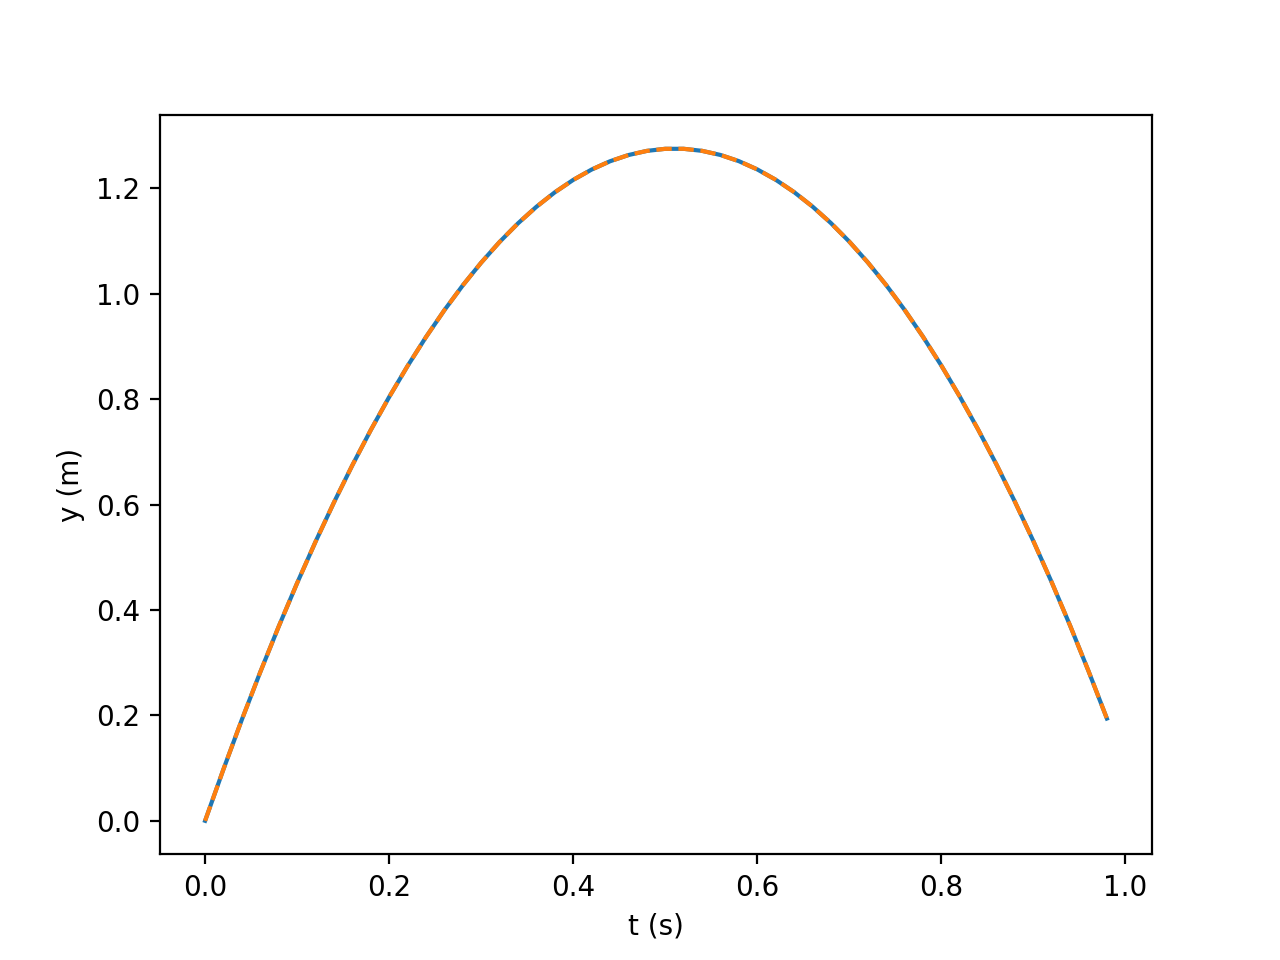

In [14]:
%matplotlib notebook
g = 9.8                         # gravitational constant

#def Euler(diffeq, y0, t, h): # uses docstring """..."""
#    """ Euler's method for n ODEs:
#        Given y0 at t, returns y1 at t+h """
#    dydt = diffeq(y0, t)     # get {dy/dt} at t
#    return y0 + h*dydt       # Euler method on a vector  
    
def freefall(y, t):          # returns {dy/dt}, the RHS of ODEs
    dydt = np.zeros(2)       # initialize 2-element numpy array 
    dydt[0] = y[1]           # f1(), 
    dydt[1] = -g             # f2(), 
    return dydt              # note: returns whole array dydt[]
     
def go(v0):                  # main program, v0=initial velocity
    y0 = [0.0, v0]           # initial values
    t, h = 0.0, 0.02         # init time, step size
    ta,ya,yb = [],[],[]      # declare arrays for plotting
    while t<1.0:             # loop for one second
        ta.append(t)         # record time and position
        ya.append(y0[0])
        yb.append(v0*t-g*t*t/2.0)
        y1 = odewrapper(freefall, y0, t, h)   # Euler's method
        for i in range(len(y0)):         # reseed y0
            y0[i] = y1[i]
        t = t + h

    plt.figure()                # start a figure
    plt.plot(ta,ya, ta,yb,'--') # draw 2nd curve as dashed
    plt.xlabel('t (s)')         # add labels
    plt.ylabel('y (m)')
    plt.show()                  # show figure
    
go(5.0)                     # run the program